In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [6]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

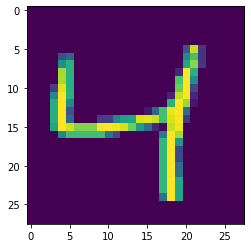

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 14s 5ms/step - loss: 0.2852 - accuracy: 0.9162 - val_loss: 0.1702 - val_accuracy: 0.9483
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1201 - accuracy: 0.9645 - val_loss: 0.1222 - val_accuracy: 0.9632
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0817 - accuracy: 0.9747 - val_loss: 0.1166 - val_accuracy: 0.9625
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0607 - accuracy: 0.9809 - val_loss: 0.1001 - val_accuracy: 0.9696
Epoch 5/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.0959 - val_accuracy: 0.9735
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0371 - accuracy: 0.9879 - val_loss: 0.0921 - val_accuracy: 0.9735
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.1157 - val_accuracy

In [16]:
y_prob=model.predict(X_test)


In [17]:
y_pred=y_prob.argmax(axis=1)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9783

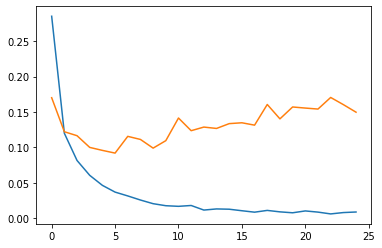

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

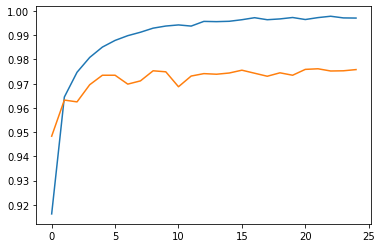

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

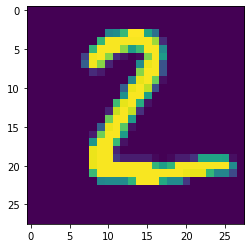

In [21]:
plt.imshow(X_test[1])

In [24]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)


array([2], dtype=int64)